In [ ]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.2 MB/s eta 0:00:00


#IMPORTING SOME LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,precision_score

import warnings
warnings.filterwarnings('ignore')

#Load the Dataset

In [ ]:
df = pd.read_csv('/content/amazon.csv',nrows=5000)

In [ ]:
df.shape

(5000, 2)

In [ ]:
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  5000 non-null   object
 1   Positive    5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [ ]:
df.columns

Index(['reviewText', 'Positive'], dtype='object')

In [ ]:
df.isnull().sum()

,0
reviewText,0
Positive,0


In [ ]:
df.duplicated().sum()

0

#Data cleaning and preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


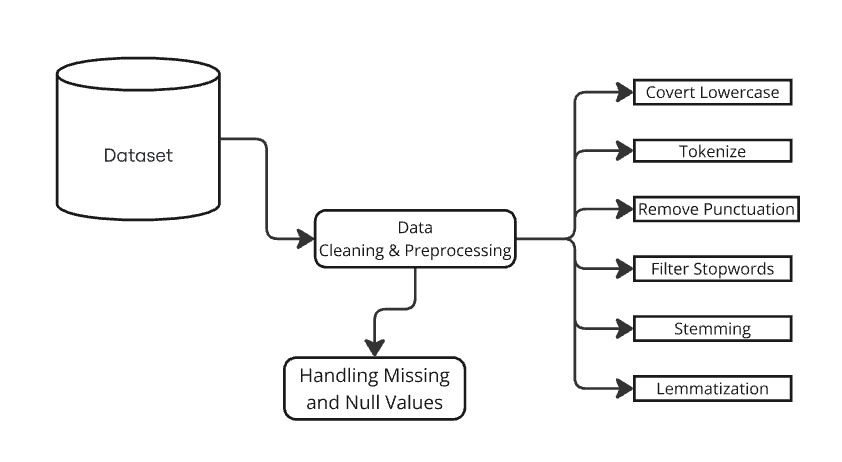

In [ ]:
from IPython.display import Image
Image('/content/Screenshot 2025-01-10 115056.png')

**Step :01**
Convert to lower case: This means that words like "Hello", "hello", and "HELLO" are treated as the same word, simplifying comparisons and matching operations

In [ ]:
import string

lower = [k.lower() for k in df['reviewText']]
print(lower[0])

this is a one of the best apps acording to a bunch of people and i agree it has bombs eggs pigs tnt king pigs and realustic stuff


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Step :02**  tokenization: The word_tokenize function from the NLTK (Natural Language Toolkit) library is commonly used for tokenizing text into words or word-like units.

In [ ]:
from nltk.tokenize import word_tokenize

token_lower = [word_tokenize(k) for k in lower]
print(token_lower[0])

['this', 'is', 'a', 'one', 'of', 'the', 'best', 'apps', 'acording', 'to', 'a', 'bunch', 'of', 'people', 'and', 'i', 'agree', 'it', 'has', 'bombs', 'eggs', 'pigs', 'tnt', 'king', 'pigs', 'and', 'realustic', 'stuff']


**Step :03**  Punctuation Removal Removing punctuation involves stripping out characters like periods, commas, exclamation marks, question marks, and so on from a piece of writing.

In [ ]:
import re


regEx = re.compile('[%s]' %re.escape(string.punctuation))
#print(regEx)

punk_token_lower = []

for k in token_lower:
  review = []
  for j in k:
    x = regEx.sub(U'',j)
    #U'' is an empty Unicode string
    if not review == U'':
      review.append(x)
  punk_token_lower.append(review)

print(punk_token_lower[0])

['this', 'is', 'a', 'one', 'of', 'the', 'best', 'apps', 'acording', 'to', 'a', 'bunch', 'of', 'people', 'and', 'i', 'agree', 'it', 'has', 'bombs', 'eggs', 'pigs', 'tnt', 'king', 'pigs', 'and', 'realustic', 'stuff']


**Step :04**  Removing Stopwords: Stopwords are commonly occurring words that are necessary for the structure of sentences but often don't contribute much to the overall meaning or context of the text and also Don't carry significant meaning

In [ ]:
from nltk.corpus import stopwords
#print(stopwords.words('english'))

stop_word = stopwords.words('english')
new_stopword = ['drug', 'medication', 'medicine', 'pharmaceutical', 'dosage', 'treatment',
    'prescription', 'patient', 'condition', 'symptom', 'disease', 'healthcare',
    'clinical', 'study', 'trial', 'use', 'including', 'may', 'also', 'however',
    'among', 'within', 'mg', 'day','year','month','mL', 'kg','would','shall','could','might','week','6','600','20','yr','10','150','039','200','hour','24','30','75','2','Mg','month','side', 'effect','birth','control','time']
stop_word.extend(new_stopword)
final_stop_word=set(stop_word)

stopword_punk_token_lower = []

for k in punk_token_lower:
  remove_stopword = []
  for j in k:
    if not j in final_stop_word:
      remove_stopword.append(j)
  stopword_punk_token_lower.append(remove_stopword)

print(stopword_punk_token_lower[0])

['one', 'best', 'apps', 'acording', 'bunch', 'people', 'agree', 'bombs', 'eggs', 'pigs', 'tnt', 'king', 'pigs', 'realustic', 'stuff']


**Step :05** Stemming and Lemmatization: Stemming is core meaning of a word and lemmatization is identify the dictionary form of a word

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
wordnet = WordNetLemmatizer()

stemLem_stopword_punk_token_lower = []

for k in stopword_punk_token_lower:
  stemLem =[]
  for j in k:
    stemLem.append(porter.stem(j))
    #stemLem.append(wordnet.lemmatize(j))
  stemLem_stopword_punk_token_lower.append(' '.join(stemLem))
print(stemLem_stopword_punk_token_lower[0])

one best app acord bunch peopl agre bomb egg pig tnt king pig realust stuff


In [ ]:
df['clean_text']= stemLem_stopword_punk_token_lower
a= stemLem_stopword_punk_token_lower


In [ ]:
df.drop(['reviewText'],axis=1,inplace=True)

In [ ]:
df.head()


,Positive,clean_text
0,1,one best app acord bunch peopl agre bomb egg p...
1,1,pretti good version game free lot differ leve...
2,1,realli cool game bunch level find golden egg ...
3,1,silli game frustrat lot fun definit recommend...
4,1,terrif game pad hr fun grandkid love great ...


#Exploratory Data Analysis

Positive
1    3930
0    1070
Name: count, dtype: int64


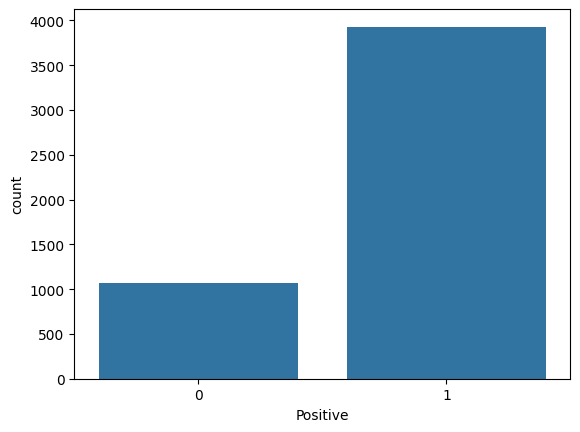

In [ ]:
#Rating
sns.countplot(x=df['Positive'])
plt.show
print(df['Positive'].value_counts())

In [ ]:
#from wordcloud import WordCloud
sentences =df['clean_text']

pos = ' '.join(map(str,sentences[df['Positive']==1]))
neg = ' '.join(map(str,sentences[df['Positive']==0]))


(-0.5, 1499.5, 799.5, -0.5)

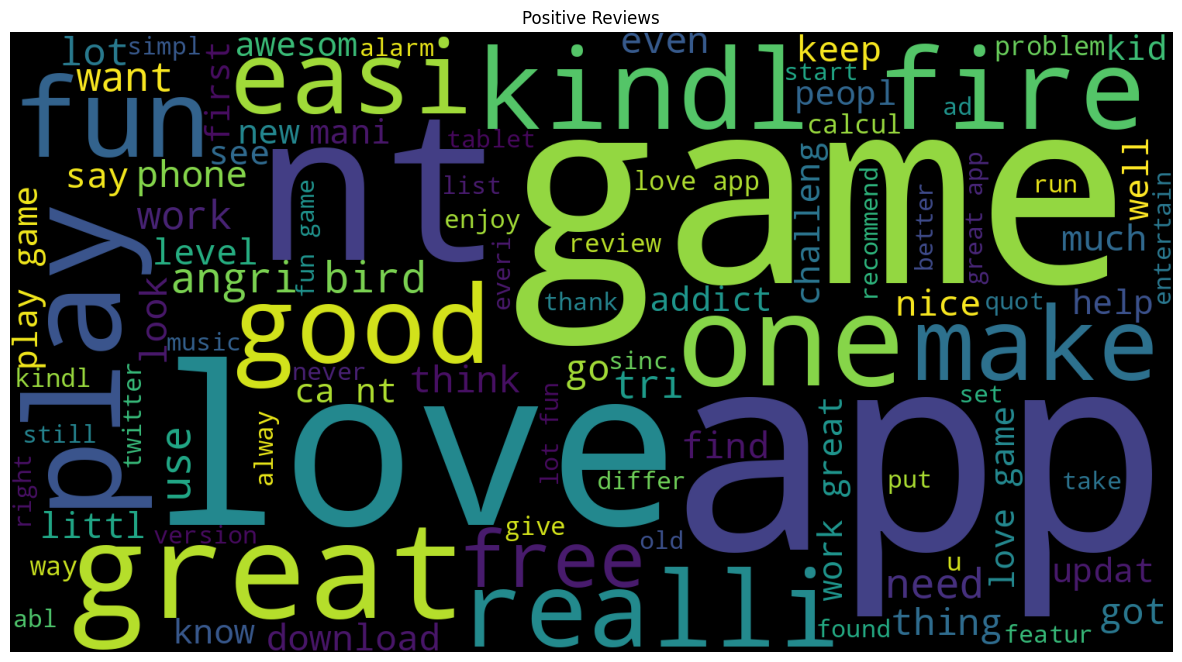

In [ ]:
pos_wordcloud = WordCloud(width=1500,height=800,min_font_size=25).generate(pos)

plt.figure(figsize=(15,15))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

(-0.5, 1499.5, 799.5, -0.5)

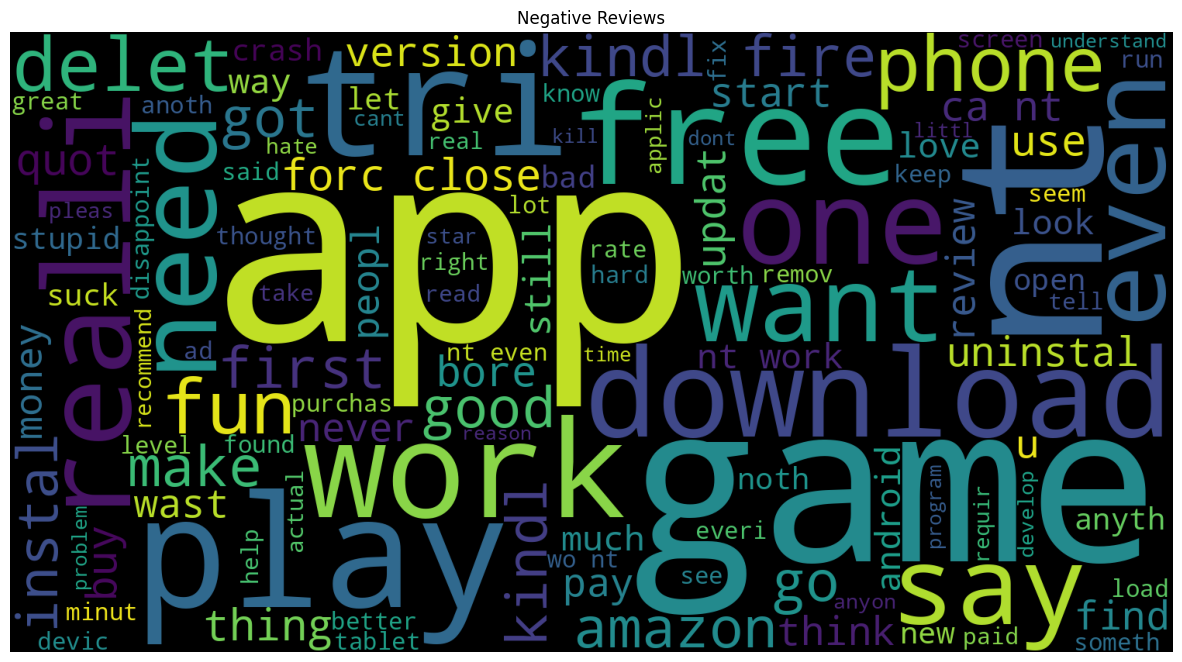

In [ ]:
neg_wordcloud = WordCloud(width=1500,height=800,min_font_size=25).generate(neg)

plt.figure(figsize=(15,15))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')

#Separate terget and feature colomns

In [ ]:
x= df['clean_text']
y= df['Positive']

In [ ]:
x.shape

(5000,)


# Convert text into numeric features using TF-IDF

In [ ]:

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x).toarray()

In [ ]:
x.shape

(5000, 6574)

# Split data into train test

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
x_train.shape,y_train.shape

((4000, 6574), (4000,))

Handling Imbalanced Datasets with SMOTETomek
# SMOTETomek: Synthetic Minority Oversampling Technique with Tomek Links





SMOTETomek is a hybrid technique that combines SMOTE (Synthetic Minority Over-sampling Technique) and Tomek Links to address the issue of imbalanced datasets.

## SMOTE (Synthetic Minority Over-sampling Technique)

1. **Purpose**: SMOTE aims to balance the dataset by increasing the number of minority class samples.

2. **Process**:
   - **Selection**: For each minority class sample, k-nearest neighbors are identified.
   - **Synthetic Sample Generation**: New synthetic samples are created by interpolating between the selected minority class sample and its k-nearest neighbors. This is done by taking a random point along the line segment between the two samples in feature space.
   - **Repetition**: This process is repeated until the minority class is sufficiently oversampled to balance the dataset.

## Tomek Links

1. **Purpose**: Tomek Links aim to clean the dataset by removing samples that are too close to each other and belong to different classes. This helps in reducing the overlap between classes and enhances the decision boundary.

2. **Process**:
   - **Identification of Tomek Links**: A pair of samples (one from the minority class and one from the majority class) are identified as a Tomek Link if they are each other’s nearest neighbors.
   - **Removal**: The identified Tomek Links are then removed from the dataset, which helps in making the classes more distinct.

## SMOTETomek

SMOTETomek combines the strengths of both SMOTE and Tomek Links to create a more balanced and cleaner dataset.

### Step-by-Step Process:
1. **SMOTE Application**: First, SMOTE is applied to the dataset to oversample the minority class by generating synthetic samples.
2. **Tomek Links Removal**: Next, Tomek Links are applied to the newly created dataset (including the synthetic samples) to remove samples that are too close to each other and belong to different classes.

### Outcome:
- The dataset becomes more balanced with an increased number of minority class samples due to SMOTE.
- The dataset also becomes cleaner with reduced overlap between classes due to the removal of Tomek Links, leading to potentially better performance of machine learning algorithms.

### Benefits of SMOTETomek
- **Balanced Dataset**: By oversampling the minority class, SMOTETomek ensures that the dataset is balanced, which helps in improving the performance of machine learning models.
- **Reduced Overlap**: By removing Tomek Links, it reduces the overlap between classes, which can enhance the model’s ability to discriminate between classes.
- **Improved Decision Boundaries**: The combined effect of SMOTE and Tomek Links can lead to cleaner decision boundaries and better generalization of the model.

## Example Workflow

### Original Dataset:
- Minority class: 100 samples
- Majority class: 1000 samples

### After SMOTE:
- Synthetic samples added to minority class: 900 samples
- Total samples for minority class: 100 + 900 = 1000 samples

### After Tomek Links:
- Some samples from both classes (that form Tomek Links) are removed.
- Final dataset: Balanced and cleaner.

`Note:` The exact final shape of the dataset after applying SMOTETomek is not fixed and can vary depending on the specific characteristics of the dataset and how many Tomek Links are identified and removed.



In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.2 MB/s eta 0:00:00


In [ ]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
x_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)




In [ ]:
# Convert resampled data back to DataFrame
balanced_df = pd.DataFrame(x_resampled, columns=vectorizer.get_feature_names_out())
balanced_df['Positive'] = y_resampled


print("Balanced dataset size:", balanced_df.shape)

Balanced dataset size: (6288, 6575)


Positive
1    3930
0    1070
Name: count, dtype: int64


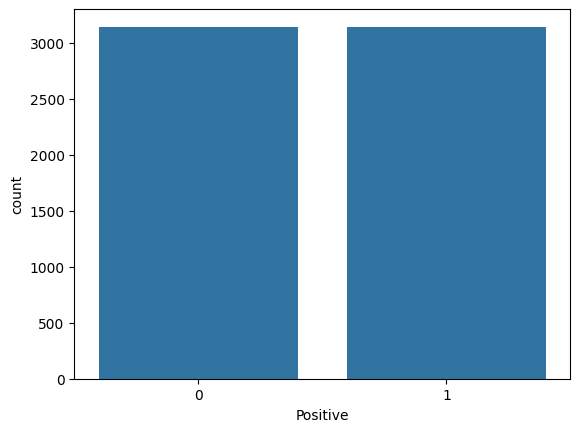

In [ ]:
#Rating
sns.countplot(x=balanced_df['Positive'])
plt.show
print(df['Positive'].value_counts())

#Model Implementation

In [ ]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.1 MB/s eta 0:00:00


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
adc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
classifiers = {

               'SVC' : svc,
               'KN' : knc,
               'NB' : mnb,
               'DTC' : dtc,
               'LR' : lrc,
               'RF' : rfc,
               'AdaBoost' : adc,
               'BGC' : bc,
               'ETC' : etc,
               'GBDT' : gbdt,
               'XGB' : xgb


}

#Model Training

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test data

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix

# Dictionary to store results
results = {}

# Iterate over classifiers
for model_name, model_instance in classifiers.items():
    accuracy, precision, recall, f1, conf_matrix = evaluate_model(
        model_instance, x_train, y_train, x_test, y_test
    )

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

    # Print results
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")



Model: SVC
Accuracy: 0.8810
Precision: 0.8928
Recall: 0.9644
F1 Score: 0.9272
Confusion Matrix:
[[123  91]
 [ 28 758]]

Model: KN
Accuracy: 0.8290
Precision: 0.8868
Recall: 0.8969
F1 Score: 0.8918
Confusion Matrix:
[[124  90]
 [ 81 705]]

Model: NB
Accuracy: 0.7920
Precision: 0.7925
Recall: 0.9962
F1 Score: 0.8828
Confusion Matrix:
[[  9 205]
 [  3 783]]

Model: DTC
Accuracy: 0.8100
Precision: 0.8098
Recall: 0.9911
F1 Score: 0.8913
Confusion Matrix:
[[ 31 183]
 [  7 779]]

Model: LR
Accuracy: 0.8640
Precision: 0.8727
Recall: 0.9682
F1 Score: 0.9180
Confusion Matrix:
[[103 111]
 [ 25 761]]

Model: RF
Accuracy: 0.8580
Precision: 0.8562
Recall: 0.9847
F1 Score: 0.9160
Confusion Matrix:
[[ 84 130]
 [ 12 774]]

Model: AdaBoost
Accuracy: 0.8230
Precision: 0.8175
Recall: 0.9975
F1 Score: 0.8986
Confusion Matrix:
[[ 39 175]
 [  2 784]]

Model: BGC
Accuracy: 0.8560
Precision: 0.8776
Recall: 0.9491
F1 Score: 0.9120
Confusion Matrix:
[[110 104]
 [ 40 746]]

Model: ETC
Accuracy: 0.8500
Precision:

#Model Evaluation

<Figure size 1200x600 with 0 Axes>

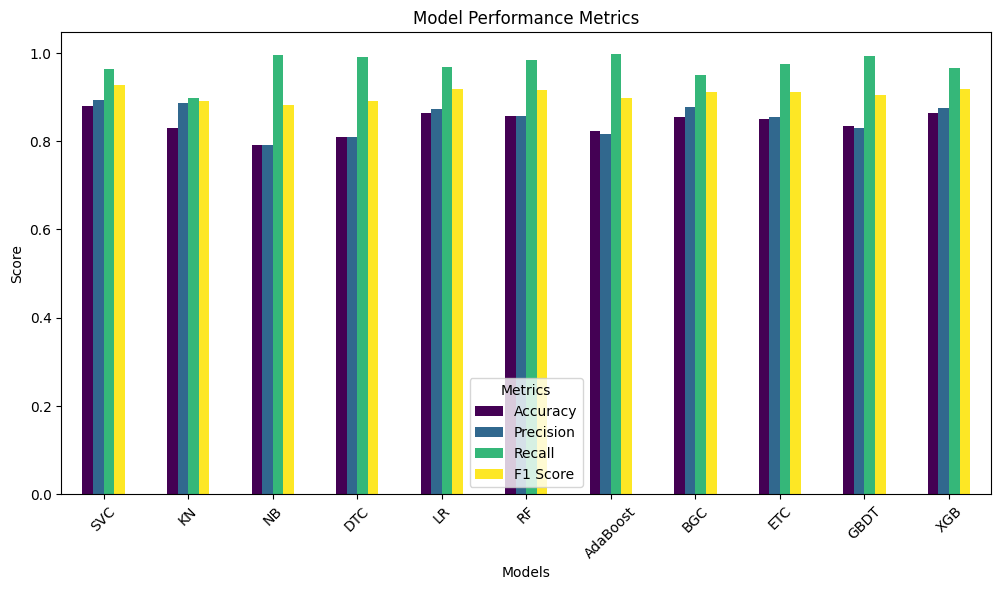

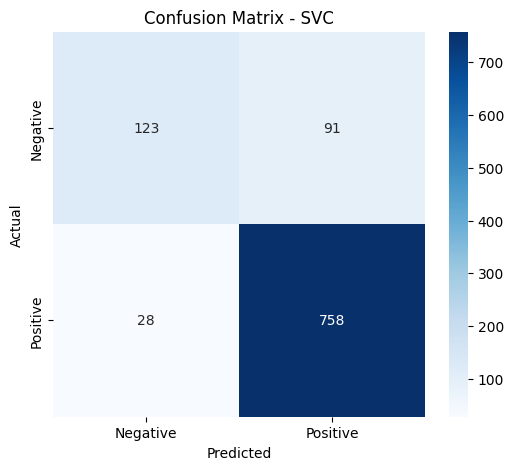

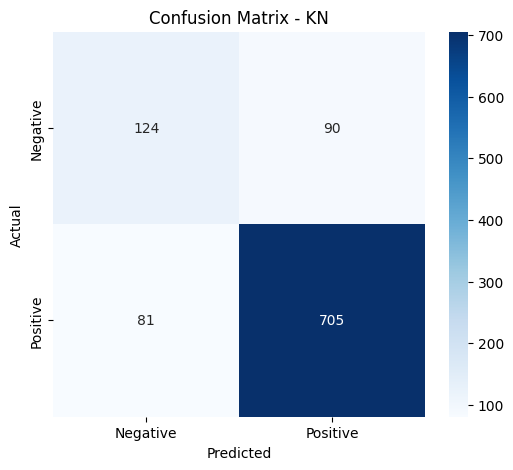

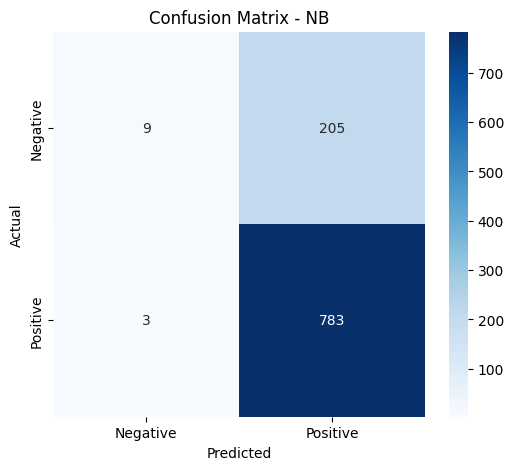

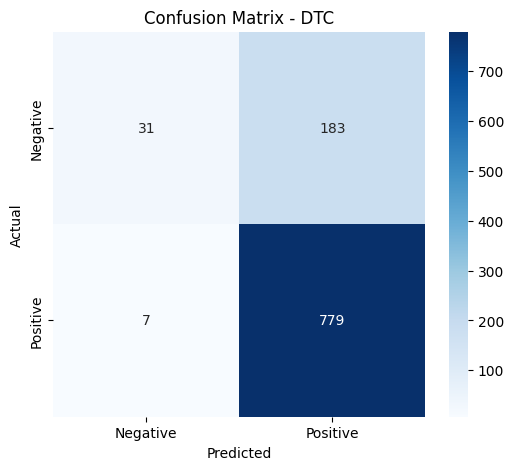

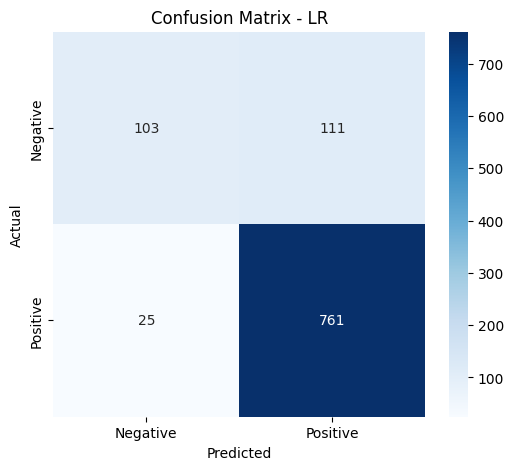

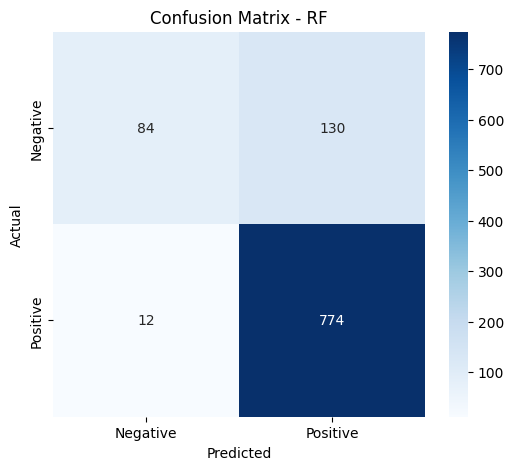

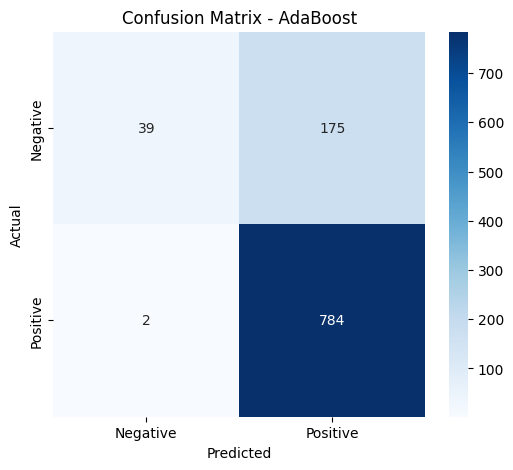

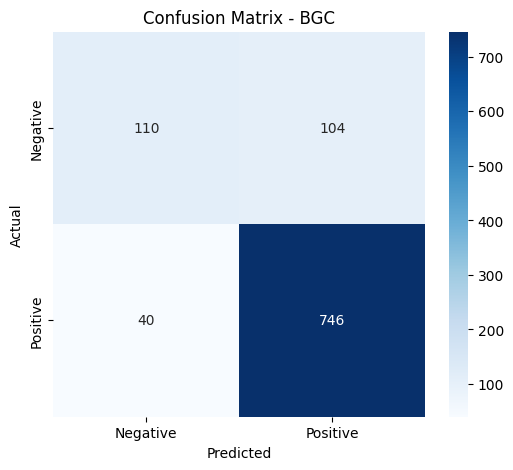

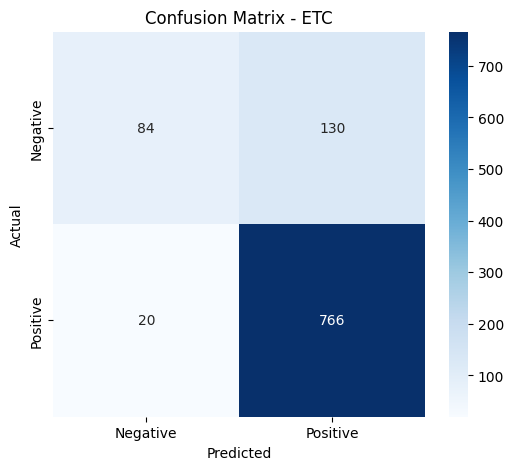

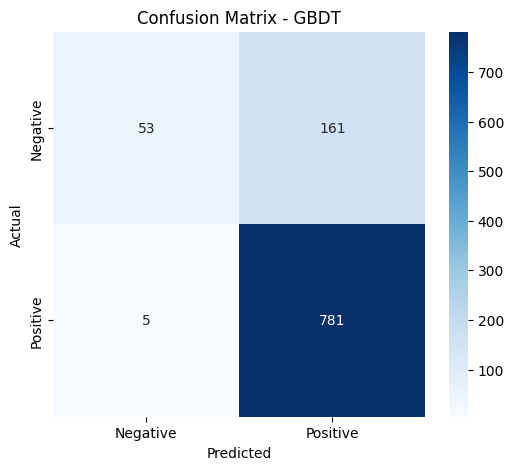

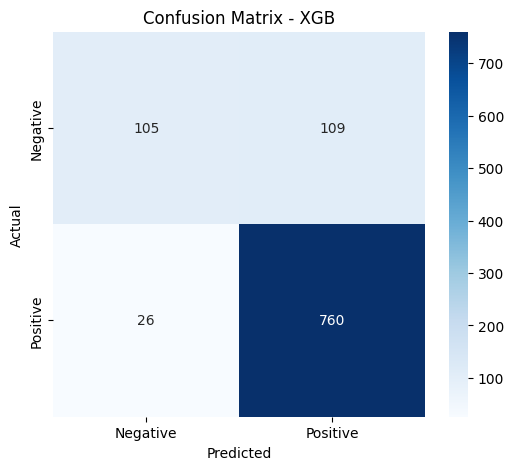

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
conf_matrices = results_df.pop("Confusion Matrix")

plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')

plt.title("Model Performance Metrics")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()


# --- CONFUSION MATRIX FOR EACH MODEL ---
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Loop through each model and plot its confusion matrix
for model_name, conf_matrix in conf_matrices.items():
    plot_confusion_matrix(conf_matrix, model_name)


#Building a prediction system for evaluating

In [ ]:
model = SVC(kernel='linear') #SVC got best performance
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
# Keep only the first row of the DataFrame


input = x_train[:1, :]  # Keeps the first row


input


array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

predicted_class =model.predict(input)
print('predicted sentiment label :',predicted_class)

predicted sentiment label : [1]


#Saving the model

In [ ]:
import joblib as jb
jb.dump(model,'Amazon_sentiment_apk')
chappie =jb.load('Amazon_sentiment_apk')